## パーセプトロンの実装

### ANDゲート　p.25

In [71]:
def AND_test(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [100]:
#ロジックの出力確認
def logic_output(func):
    name = func.__name__
    args =[[0,0],[1,0],[0,1],[1,1]]
    for arg in args:
        print('{}({},{}): {}'.format(name,arg[0],arg[1],func(arg[0],arg[1])))

In [101]:
logic_output(AND_test)

AND_test(0,0): 0
AND_test(1,0): 0
AND_test(0,1): 0
AND_test(1,1): 1


### ANDゲート numpyによる実装　p.26

In [73]:
import numpy as np

In [74]:
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7

In [75]:
w*x

array([0. , 0.5])

In [76]:
np.sum(w*x)+b

-0.19999999999999996

In [77]:
def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(x*w) +b
    if tmp <= 0:
        return 0
    else:
        return 1

#### wは重み、bはバイアス

In [102]:
logic_output(AND)

AND(0,0): 0
AND(1,0): 0
AND(0,1): 0
AND(1,1): 1


### NANDゲート p.27

In [106]:
def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(x*w) +b
    if tmp <= 0:
        return 0
    else:
        return 1

In [107]:
logic_output(NAND)

NAND(0,0): 1
NAND(1,0): 1
NAND(0,1): 1
NAND(1,1): 0


### ORゲート p.27

In [108]:
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(x*w) +b
    if tmp <= 0:
        return 0
    else:
        return 1

In [109]:
logic_output(OR)

OR(0,0): 0
OR(1,0): 1
OR(0,1): 1
OR(1,1): 1


### XORゲート p.28

In [110]:
import matplotlib.pylab as plt
%matplotlib inline

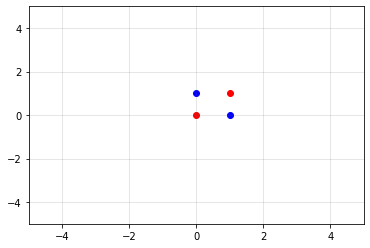

In [111]:
plt.scatter([0,1],[0,1], c="red")
plt.scatter([1,0],[0,1], c="blue")
plt.axis([-5, 5,-5, 5])#軸スケール調整
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.2)

#### 赤と青を直線で分けることができないので先と同じ実装方法ではXORゲートは実装できない<br>層を組み合わせてXORを実装する。

In [114]:
def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [115]:
logic_output(XOR)

XOR(0,0): 0
XOR(1,0): 1
XOR(0,1): 1
XOR(1,1): 0
